# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

15:54:27 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=741614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=40687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=202260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=897895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=811469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=801039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

15:54:29 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=539432;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=107311;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

15:54:30 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=495554;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=7955;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

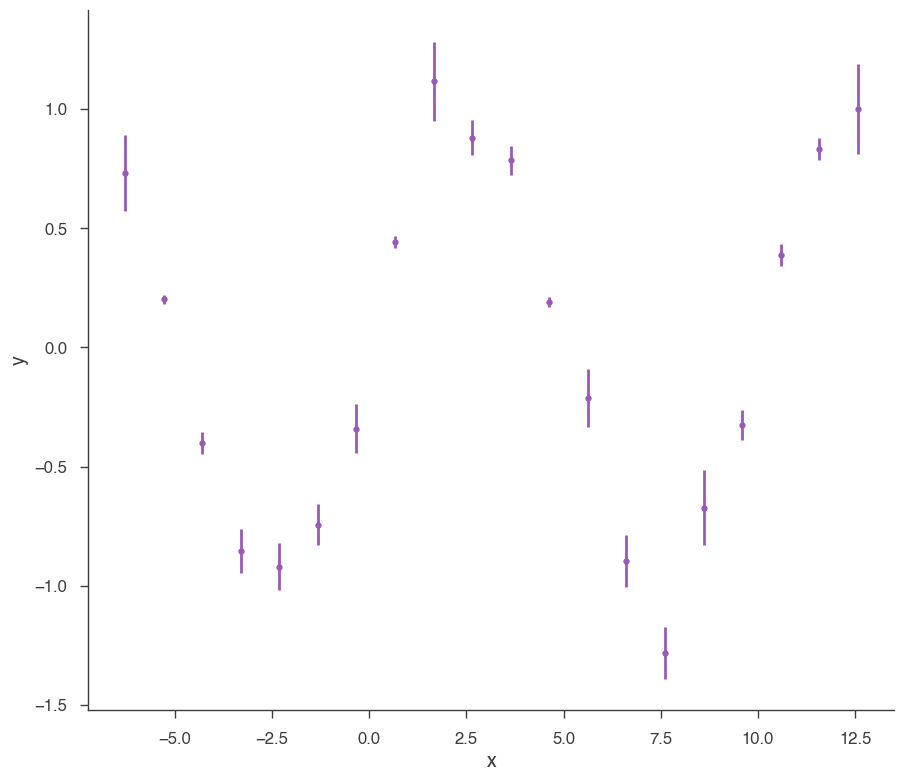

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=980105;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=398164;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

15:54:35 INFO      Mean acceptance fraction: 0.7132999999999998                                ]8;id=928234;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=568988;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

15:54:36 INFO      fit restored to maximum of posterior                                         ]8;id=589859;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=470097;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=946923;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=422029;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                 
demo.spectrum.main.Sin.K              1.009 -0.025 +0.021  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0046 -0.0033 +0.004) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.562686
total       -11.562686

Values of statistical measures:

statistical measures
AIC              27.831255
BIC              29.116837
DIC              27.096902
PDIC              1.980052

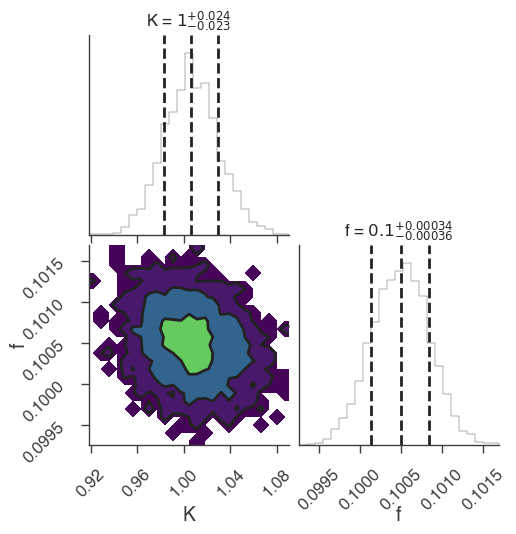

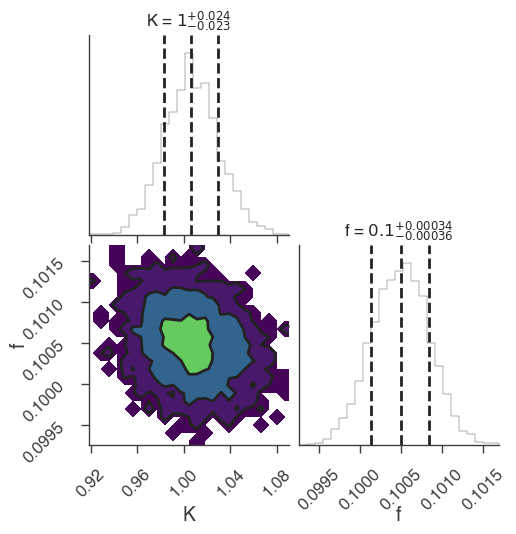

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

15:54:37 INFO      sampler set to multinest                                                ]8;id=709937;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=807758;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -20.703411979164724      +/-  0.14287301748140147     
 Total Likelihood Evaluations:         6480
 Sampling finished. Exiting MultiNest



15:54:39 INFO      fit restored to maximum of posterior                                         ]8;id=373748;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=305155;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=780304;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=912967;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                 
demo.spectrum.main.Sin.K              1.010 -0.027 +0.021  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0045 -0.0032 +0.004) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.564899
total       -11.564899

Values of statistical measures:

statistical measures
AIC                27.835680
BIC                29.121262
DIC                27.249421
PDIC                2.061257
log(Z)             -8.991378

         INFO      deleting the chain directory chains                                     ]8;id=460985;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=278113;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

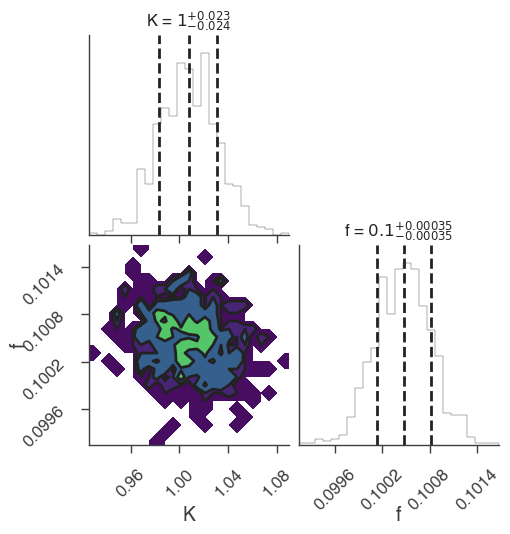

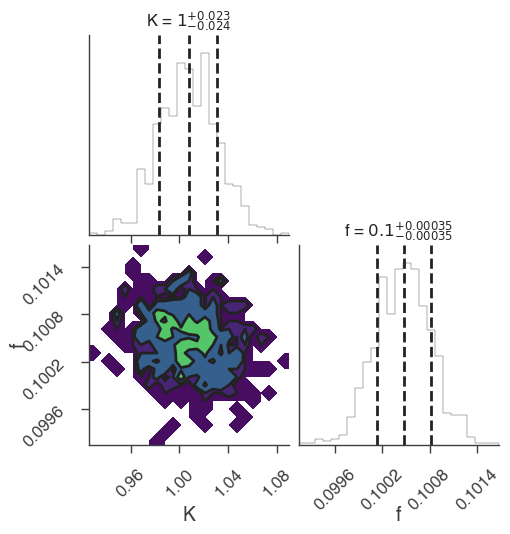

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

15:54:40 INFO      sampler set to dynesty_nested                                           ]8;id=137753;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=707164;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

129it [00:00, 1286.22it/s, bound: 0 | nc: 1 | ncall: 546 | eff(%): 23.626 | loglstar:   -inf < -3174.261 <    inf | logz: -3181.267 +/-  0.132 | dlogz: 3167.895 >  0.409]

258it [00:00, 1233.81it/s, bound: 0 | nc: 1 | ncall: 752 | eff(%): 34.309 | loglstar:   -inf < -2256.892 <    inf | logz: -2263.132 +/-  0.120 | dlogz: 2244.310 >  0.409]

382it [00:00, 1139.05it/s, bound: 0 | nc: 1 | ncall: 1005 | eff(%): 38.010 | loglstar:   -inf < -1846.363 <    inf | logz: -1854.001 +/-  0.138 | dlogz: 1842.047 >  0.409]

497it [00:00, 896.41it/s, bound: 0 | nc: 5 | ncall: 1343 | eff(%): 37.007 | loglstar:   -inf < -1551.314 <    inf | logz: -1558.204 +/-  0.128 | dlogz: 1539.005 >  0.409] 

593it [00:00, 714.80it/s, bound: 0 | nc: 5 | ncall: 1740 | eff(%): 34.080 | loglstar:   -inf < -1362.404 <    inf | logz: -1368.988 +/-  0.122 | dlogz: 1349.009 >  0.409]

672it [00:00, 620.59it/s, bound: 0 | nc: 3 | ncall: 2096 | eff(%): 32.061 | loglstar:   -inf < -1257.880 <    inf | logz: -1264.955 +/-  0.128 | dlogz: 1244.959 >  0.409]

740it [00:01, 511.72it/s, bound: 0 | nc: 11 | ncall: 2530 | eff(%): 29.249 | loglstar:   -inf < -1175.319 <    inf | logz: -1183.436 +/-  0.135 | dlogz: 1167.711 >  0.409]

797it [00:01, 480.71it/s, bound: 0 | nc: 4 | ncall: 2825 | eff(%): 28.212 | loglstar:   -inf < -1112.588 <    inf | logz: -1120.564 +/-  0.130 | dlogz: 1104.076 >  0.409] 

849it [00:01, 425.14it/s, bound: 0 | nc: 8 | ncall: 3191 | eff(%): 26.606 | loglstar:   -inf < -1026.391 <    inf | logz: -1033.591 +/-  0.130 | dlogz: 1016.653 >  0.409]

894it [00:01, 384.48it/s, bound: 0 | nc: 7 | ncall: 3523 | eff(%): 25.376 | loglstar:   -inf < -965.613 <    inf | logz: -974.262 +/-  0.141 | dlogz: 958.562 >  0.409]   

934it [00:01, 351.19it/s, bound: 0 | nc: 8 | ncall: 3849 | eff(%): 24.266 | loglstar:   -inf < -928.180 <    inf | logz: -936.562 +/-  0.135 | dlogz: 919.887 >  0.409]

970it [00:01, 275.37it/s, bound: 0 | nc: 24 | ncall: 4352 | eff(%): 22.289 | loglstar:   -inf < -901.076 <    inf | logz: -908.501 +/-  0.127 | dlogz: 891.111 >  0.409]

1000it [00:02, 264.27it/s, bound: 0 | nc: 1 | ncall: 4746 | eff(%): 21.070 | loglstar:   -inf < -886.738 <    inf | logz: -894.521 +/-  0.128 | dlogz: 877.203 >  0.409]

1028it [00:02, 229.85it/s, bound: 0 | nc: 31 | ncall: 5136 | eff(%): 20.016 | loglstar:   -inf < -876.828 <    inf | logz: -885.925 +/-  0.145 | dlogz: 870.115 >  0.409]

1052it [00:02, 206.70it/s, bound: 0 | nc: 23 | ncall: 5505 | eff(%): 19.110 | loglstar:   -inf < -837.761 <    inf | logz: -846.359 +/-  0.141 | dlogz: 829.591 >  0.409]

1074it [00:02, 197.84it/s, bound: 0 | nc: 7 | ncall: 5827 | eff(%): 18.431 | loglstar:   -inf < -811.170 <    inf | logz: -819.851 +/-  0.140 | dlogz: 802.891 >  0.409] 

1099it [00:02, 209.04it/s, bound: 0 | nc: 11 | ncall: 6116 | eff(%): 17.969 | loglstar:   -inf < -768.623 <    inf | logz: -777.971 +/-  0.150 | dlogz: 762.761 >  0.409]

1121it [00:02, 200.67it/s, bound: 0 | nc: 11 | ncall: 6476 | eff(%): 17.310 | loglstar:   -inf < -740.984 <    inf | logz: -749.209 +/-  0.140 | dlogz: 731.789 >  0.409]

1142it [00:02, 171.68it/s, bound: 0 | nc: 100 | ncall: 6871 | eff(%): 16.621 | loglstar:   -inf < -708.091 <    inf | logz: -716.582 +/-  0.142 | dlogz: 699.393 >  0.409]

1160it [00:03, 152.42it/s, bound: 0 | nc: 52 | ncall: 7235 | eff(%): 16.033 | loglstar:   -inf < -655.620 <    inf | logz: -664.440 +/-  0.145 | dlogz: 647.510 >  0.409] 

1176it [00:03, 133.47it/s, bound: 0 | nc: 64 | ncall: 7625 | eff(%): 15.423 | loglstar:   -inf < -614.708 <    inf | logz: -623.743 +/-  0.145 | dlogz: 606.890 >  0.409]

1190it [00:03, 126.09it/s, bound: 0 | nc: 45 | ncall: 7920 | eff(%): 15.025 | loglstar:   -inf < -590.341 <    inf | logz: -598.653 +/-  0.139 | dlogz: 581.011 >  0.409]

1203it [00:03, 122.65it/s, bound: 0 | nc: 24 | ncall: 8183 | eff(%): 14.701 | loglstar:   -inf < -558.425 <    inf | logz: -566.959 +/-  0.143 | dlogz: 549.539 >  0.409]

1216it [00:03, 123.81it/s, bound: 0 | nc: 6 | ncall: 8411 | eff(%): 14.457 | loglstar:   -inf < -533.148 <    inf | logz: -542.167 +/-  0.146 | dlogz: 525.086 >  0.409] 

1229it [00:03, 123.93it/s, bound: 0 | nc: 4 | ncall: 8640 | eff(%): 14.225 | loglstar:   -inf < -507.401 <    inf | logz: -516.010 +/-  0.140 | dlogz: 498.242 >  0.409]

1242it [00:03, 110.98it/s, bound: 0 | nc: 6 | ncall: 8979 | eff(%): 13.832 | loglstar:   -inf < -472.360 <    inf | logz: -481.054 +/-  0.147 | dlogz: 463.725 >  0.409]

1256it [00:03, 117.71it/s, bound: 0 | nc: 23 | ncall: 9205 | eff(%): 13.645 | loglstar:   -inf < -455.397 <    inf | logz: -464.598 +/-  0.145 | dlogz: 447.378 >  0.409]

1269it [00:04, 100.48it/s, bound: 0 | nc: 16 | ncall: 9587 | eff(%): 13.237 | loglstar:   -inf < -429.020 <    inf | logz: -437.684 +/-  0.142 | dlogz: 419.961 >  0.409]

1284it [00:04, 111.69it/s, bound: 0 | nc: 16 | ncall: 9811 | eff(%): 13.087 | loglstar:   -inf < -404.319 <    inf | logz: -413.771 +/-  0.148 | dlogz: 396.861 >  0.409]

1297it [00:04, 114.53it/s, bound: 0 | nc: 29 | ncall: 10025 | eff(%): 12.938 | loglstar:   -inf < -387.360 <    inf | logz: -396.156 +/-  0.141 | dlogz: 378.207 >  0.409]

1309it [00:04, 105.74it/s, bound: 0 | nc: 69 | ncall: 10334 | eff(%): 12.667 | loglstar:   -inf < -365.332 <    inf | logz: -374.328 +/-  0.143 | dlogz: 356.567 >  0.409]

1321it [00:04, 103.81it/s, bound: 0 | nc: 47 | ncall: 10614 | eff(%): 12.446 | loglstar:   -inf < -348.939 <    inf | logz: -358.129 +/-  0.145 | dlogz: 340.531 >  0.409]

1332it [00:04, 101.44it/s, bound: 0 | nc: 6 | ncall: 10874 | eff(%): 12.249 | loglstar:   -inf < -335.285 <    inf | logz: -344.686 +/-  0.150 | dlogz: 329.665 >  0.409] 

1343it [00:04, 102.85it/s, bound: 0 | nc: 3 | ncall: 11104 | eff(%): 12.095 | loglstar:   -inf < -326.317 <    inf | logz: -335.425 +/-  0.143 | dlogz: 319.698 >  0.409]

1355it [00:04, 99.20it/s, bound: 0 | nc: 98 | ncall: 11399 | eff(%): 11.887 | loglstar:   -inf < -318.246 <    inf | logz: -326.646 +/-  0.138 | dlogz: 310.551 >  0.409]

1366it [00:05, 95.66it/s, bound: 0 | nc: 2 | ncall: 11680 | eff(%): 11.695 | loglstar:   -inf < -308.983 <    inf | logz: -317.647 +/-  0.143 | dlogz: 301.705 >  0.409] 

1376it [00:05, 75.96it/s, bound: 0 | nc: 14 | ncall: 12135 | eff(%): 11.339 | loglstar:   -inf < -298.672 <    inf | logz: -308.361 +/-  0.150 | dlogz: 293.364 >  0.409]

1385it [00:05, 74.24it/s, bound: 0 | nc: 39 | ncall: 12426 | eff(%): 11.146 | loglstar:   -inf < -289.173 <    inf | logz: -298.675 +/-  0.145 | dlogz: 283.093 >  0.409]

1393it [00:05, 64.48it/s, bound: 0 | nc: 67 | ncall: 12818 | eff(%): 10.868 | loglstar:   -inf < -282.653 <    inf | logz: -291.689 +/-  0.145 | dlogz: 275.881 >  0.409]

1400it [00:05, 55.26it/s, bound: 0 | nc: 118 | ncall: 13249 | eff(%): 10.567 | loglstar:   -inf < -278.397 <    inf | logz: -287.333 +/-  0.143 | dlogz: 271.379 >  0.409]

1406it [00:05, 51.72it/s, bound: 0 | nc: 35 | ncall: 13549 | eff(%): 10.377 | loglstar:   -inf < -274.271 <    inf | logz: -283.068 +/-  0.143 | dlogz: 267.036 >  0.409] 

1412it [00:06, 52.17it/s, bound: 0 | nc: 30 | ncall: 13805 | eff(%): 10.228 | loglstar:   -inf < -269.412 <    inf | logz: -278.399 +/-  0.146 | dlogz: 262.500 >  0.409]

1423it [00:06, 63.66it/s, bound: 0 | nc: 46 | ncall: 14059 | eff(%): 10.122 | loglstar:   -inf < -262.975 <    inf | logz: -271.577 +/-  0.140 | dlogz: 255.228 >  0.409]

1430it [00:06, 62.97it/s, bound: 0 | nc: 102 | ncall: 14328 | eff(%):  9.980 | loglstar:   -inf < -257.699 <    inf | logz: -266.961 +/-  0.144 | dlogz: 250.934 >  0.409]

1437it [00:06, 52.44it/s, bound: 1 | nc: 2 | ncall: 14338 | eff(%): 10.022 | loglstar:   -inf < -255.096 <    inf | logz: -263.535 +/-  0.140 | dlogz: 247.141 >  0.409]  

1553it [00:06, 301.16it/s, bound: 1 | nc: 2 | ncall: 14480 | eff(%): 10.725 | loglstar:   -inf < -200.535 <    inf | logz: -209.665 +/-  0.145 | dlogz: 194.011 >  0.409]

1647it [00:06, 455.82it/s, bound: 1 | nc: 1 | ncall: 14628 | eff(%): 11.259 | loglstar:   -inf < -166.825 <    inf | logz: -176.061 +/-  0.143 | dlogz: 160.115 >  0.409]

1726it [00:06, 539.89it/s, bound: 1 | nc: 3 | ncall: 14787 | eff(%): 11.672 | loglstar:   -inf < -139.766 <    inf | logz: -148.831 +/-  0.142 | dlogz: 132.520 >  0.409]

1788it [00:07, 375.61it/s, bound: 2 | nc: 1 | ncall: 14942 | eff(%): 11.966 | loglstar:   -inf < -121.719 <    inf | logz: -130.927 +/-  0.143 | dlogz: 114.658 >  0.409]

1905it [00:07, 536.97it/s, bound: 2 | nc: 1 | ncall: 15079 | eff(%): 12.633 | loglstar:   -inf < -95.896 <    inf | logz: -105.132 +/-  0.144 | dlogz: 88.871 >  0.409]  

2006it [00:07, 642.32it/s, bound: 2 | nc: 2 | ncall: 15227 | eff(%): 13.174 | loglstar:   -inf < -80.307 <    inf | logz: -89.232 +/-  0.143 | dlogz: 72.613 >  0.409] 

2086it [00:07, 679.85it/s, bound: 2 | nc: 5 | ncall: 15382 | eff(%): 13.561 | loglstar:   -inf < -67.745 <    inf | logz: -76.718 +/-  0.143 | dlogz: 59.875 >  0.409]

2166it [00:07, 479.77it/s, bound: 3 | nc: 1 | ncall: 15551 | eff(%): 13.928 | loglstar:   -inf < -58.509 <    inf | logz: -67.737 +/-  0.144 | dlogz: 50.697 >  0.409]

2268it [00:07, 586.50it/s, bound: 3 | nc: 1 | ncall: 15696 | eff(%): 14.450 | loglstar:   -inf < -47.371 <    inf | logz: -56.668 +/-  0.144 | dlogz: 39.358 >  0.409]

2357it [00:07, 651.18it/s, bound: 3 | nc: 3 | ncall: 15854 | eff(%): 14.867 | loglstar:   -inf < -40.688 <    inf | logz: -49.946 +/-  0.143 | dlogz: 32.559 >  0.409]

2436it [00:07, 672.54it/s, bound: 3 | nc: 9 | ncall: 16031 | eff(%): 15.196 | loglstar:   -inf < -34.511 <    inf | logz: -43.712 +/-  0.145 | dlogz: 26.115 >  0.409]

2514it [00:08, 474.27it/s, bound: 4 | nc: 1 | ncall: 16165 | eff(%): 15.552 | loglstar:   -inf < -31.066 <    inf | logz: -40.040 +/-  0.142 | dlogz: 22.248 >  0.409]

2617it [00:08, 581.77it/s, bound: 4 | nc: 4 | ncall: 16315 | eff(%): 16.040 | loglstar:   -inf < -25.897 <    inf | logz: -35.316 +/-  0.144 | dlogz: 17.274 >  0.409]

2696it [00:08, 625.80it/s, bound: 4 | nc: 2 | ncall: 16466 | eff(%): 16.373 | loglstar:   -inf < -23.462 <    inf | logz: -32.693 +/-  0.143 | dlogz: 14.439 >  0.409]

2772it [00:08, 653.68it/s, bound: 4 | nc: 1 | ncall: 16630 | eff(%): 16.669 | loglstar:   -inf < -21.683 <    inf | logz: -30.805 +/-  0.142 | dlogz: 12.354 >  0.409]

2847it [00:08, 455.66it/s, bound: 5 | nc: 1 | ncall: 16766 | eff(%): 16.981 | loglstar:   -inf < -20.044 <    inf | logz: -29.227 +/-  0.143 | dlogz: 10.586 >  0.409]

2958it [00:08, 582.32it/s, bound: 5 | nc: 2 | ncall: 16905 | eff(%): 17.498 | loglstar:   -inf < -18.082 <    inf | logz: -27.301 +/-  0.143 | dlogz:  8.378 >  0.409]

3051it [00:09, 657.47it/s, bound: 5 | nc: 2 | ncall: 17054 | eff(%): 17.890 | loglstar:   -inf < -16.662 <    inf | logz: -25.947 +/-  0.143 | dlogz:  6.790 >  0.409]

3132it [00:09, 672.69it/s, bound: 5 | nc: 2 | ncall: 17237 | eff(%): 18.170 | loglstar:   -inf < -15.743 <    inf | logz: -24.986 +/-  0.144 | dlogz:  5.627 >  0.409]

3210it [00:09, 474.63it/s, bound: 6 | nc: 2 | ncall: 17379 | eff(%): 18.471 | loglstar:   -inf < -15.075 <    inf | logz: -24.265 +/-  0.143 | dlogz:  4.714 >  0.409]

3319it [00:09, 592.90it/s, bound: 6 | nc: 2 | ncall: 17522 | eff(%): 18.942 | loglstar:   -inf < -14.158 <    inf | logz: -23.443 +/-  0.144 | dlogz:  3.636 >  0.409]

3398it [00:09, 634.18it/s, bound: 6 | nc: 5 | ncall: 17683 | eff(%): 19.216 | loglstar:   -inf < -13.603 <    inf | logz: -22.937 +/-  0.144 | dlogz:  2.959 >  0.409]

3475it [00:09, 648.49it/s, bound: 6 | nc: 5 | ncall: 17870 | eff(%): 19.446 | loglstar:   -inf < -13.246 <    inf | logz: -22.533 +/-  0.144 | dlogz:  2.403 >  0.409]

3550it [00:10, 465.46it/s, bound: 7 | nc: 1 | ncall: 17992 | eff(%): 19.731 | loglstar:   -inf < -12.984 <    inf | logz: -22.229 +/-  0.144 | dlogz:  1.967 >  0.409]

3663it [00:10, 594.90it/s, bound: 7 | nc: 4 | ncall: 18166 | eff(%): 20.164 | loglstar:   -inf < -12.667 <    inf | logz: -21.875 +/-  0.144 | dlogz:  1.447 >  0.409]

3754it [00:10, 662.57it/s, bound: 7 | nc: 2 | ncall: 18323 | eff(%): 20.488 | loglstar:   -inf < -12.422 <    inf | logz: -21.654 +/-  0.144 | dlogz:  1.123 >  0.409]

3835it [00:10, 659.56it/s, bound: 7 | nc: 9 | ncall: 18533 | eff(%): 20.693 | loglstar:   -inf < -12.276 <    inf | logz: -21.496 +/-  0.144 | dlogz:  0.895 >  0.409]

3911it [00:10, 501.70it/s, bound: 8 | nc: 1 | ncall: 18624 | eff(%): 21.000 | loglstar:   -inf < -12.141 <    inf | logz: -21.373 +/-  0.144 | dlogz:  0.722 >  0.409]

4010it [00:10, 598.06it/s, bound: 8 | nc: 4 | ncall: 18778 | eff(%): 21.355 | loglstar:   -inf < -12.019 <    inf | logz: -21.245 +/-  0.144 | dlogz:  0.546 >  0.409]

4095it [00:10, 653.62it/s, bound: 8 | nc: 2 | ncall: 18939 | eff(%): 21.622 | loglstar:   -inf < -11.930 <    inf | logz: -21.158 +/-  0.144 | dlogz:  0.431 >  0.409]

4113it [00:10, 376.87it/s, +400 | bound: 8 | nc: 1 | ncall: 19383 | eff(%): 23.774 | loglstar:   -inf < -11.555 <    inf | logz: -20.791 +/-  0.143 | dlogz:  0.001 >  0.409]

15:54:51 INFO      fit restored to maximum of posterior                                         ]8;id=253558;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=288420;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=923081;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=883445;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                 
demo.spectrum.main.Sin.K              1.009 -0.027 +0.023  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0044 -0.0031 +0.004) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.563911
total       -11.563911

Values of statistical measures:

statistical measures
AIC                27.833704
BIC                29.119286
DIC                27.097817
PDIC                1.985227
log(Z)             -9.029299

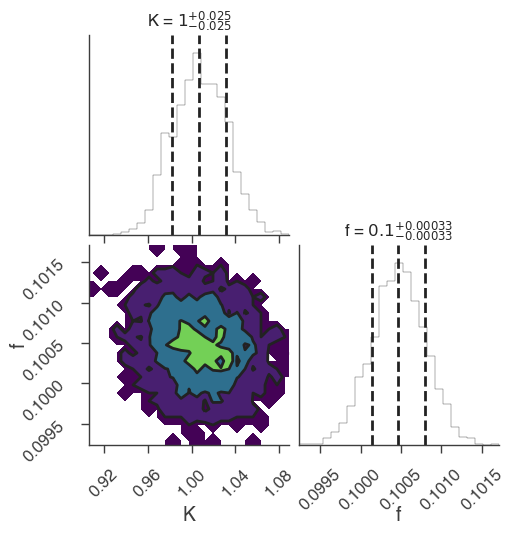

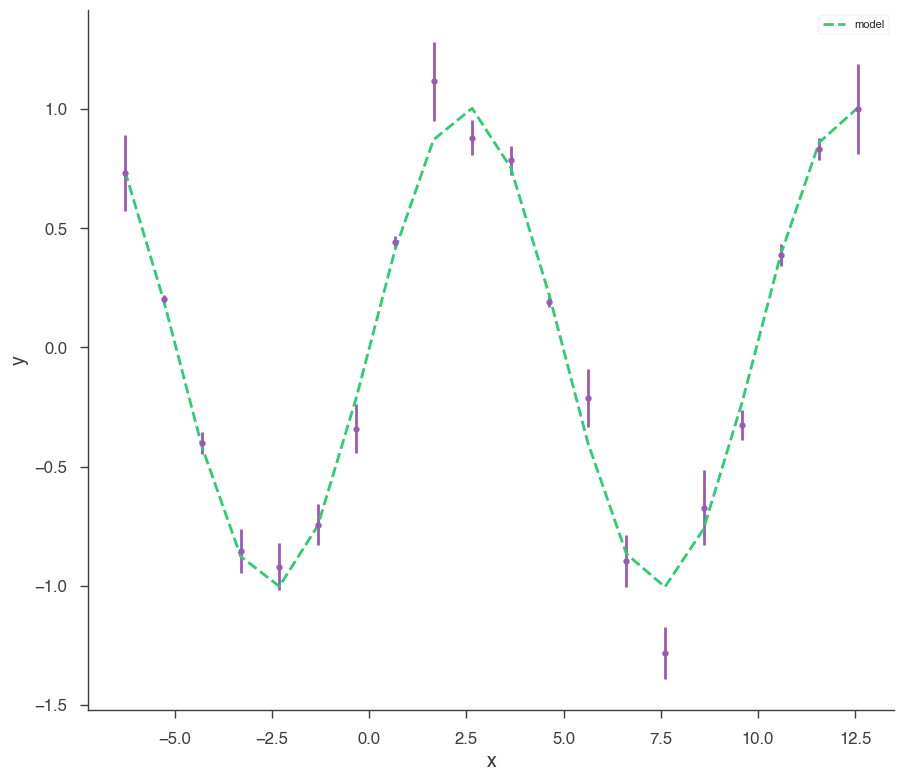

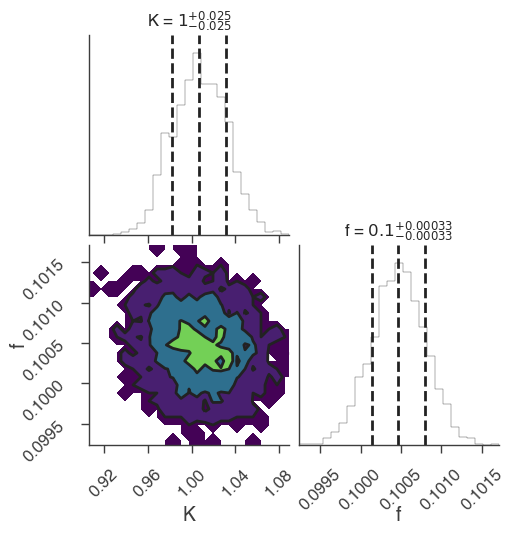

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

15:54:52 INFO      sampler set to dynesty_dynamic                                          ]8;id=21247;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=392594;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

54it [00:00, 538.75it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 54 | eff(%):  9.747 | loglstar:   -inf < -4862.833 <    inf | logz: -4869.849 +/-  0.118 | dlogz: 4895.269 >  0.010]

169it [00:00, 893.77it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 208 | eff(%): 23.870 | loglstar:   -inf < -3127.279 <    inf | logz: -3134.508 +/-  0.119 | dlogz: 3126.681 >  0.010]

275it [00:00, 968.68it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 368 | eff(%): 31.682 | loglstar:   -inf < -2556.963 <    inf | logz: -2563.427 +/-  0.112 | dlogz: 2552.012 >  0.010]

372it [00:00, 934.50it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 555 | eff(%): 35.261 | loglstar:   -inf < -2120.250 <    inf | logz: -2127.142 +/-  0.112 | dlogz: 2115.551 >  0.010]

466it [00:00, 831.10it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 807 | eff(%): 35.654 | loglstar:   -inf < -1809.080 <    inf | logz: -1816.702 +/-  0.119 | dlogz: 1805.728 >  0.010]

551it [00:00, 788.88it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1023 | eff(%): 36.179 | loglstar:   -inf < -1663.714 <    inf | logz: -1671.442 +/-  0.119 | dlogz: 1660.116 >  0.010]

632it [00:00, 747.98it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1269 | eff(%): 35.726 | loglstar:   -inf < -1525.571 <    inf | logz: -1533.485 +/-  0.120 | dlogz: 1522.058 >  0.010]

708it [00:00, 669.58it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 1549 | eff(%): 34.553 | loglstar:   -inf < -1412.764 <    inf | logz: -1420.102 +/-  0.113 | dlogz: 1407.402 >  0.010]

777it [00:01, 606.96it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1841 | eff(%): 33.191 | loglstar:   -inf < -1330.636 <    inf | logz: -1338.190 +/-  0.115 | dlogz: 1325.373 >  0.010]

840it [00:01, 538.34it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 2172 | eff(%): 31.437 | loglstar:   -inf < -1269.915 <    inf | logz: -1276.853 +/-  0.114 | dlogz: 1263.658 >  0.010]

896it [00:01, 513.99it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2427 | eff(%): 30.612 | loglstar:   -inf < -1212.142 <    inf | logz: -1219.933 +/-  0.120 | dlogz: 1207.234 >  0.010]

949it [00:01, 441.92it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2789 | eff(%): 28.854 | loglstar:   -inf < -1153.445 <    inf | logz: -1161.977 +/-  0.126 | dlogz: 1150.092 >  0.010]

995it [00:01, 403.00it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 3102 | eff(%): 27.624 | loglstar:   -inf < -1108.189 <    inf | logz: -1116.354 +/-  0.122 | dlogz: 1103.522 >  0.010]

1037it [00:01, 367.49it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 3416 | eff(%): 26.481 | loglstar:   -inf < -1053.829 <    inf | logz: -1062.396 +/-  0.124 | dlogz: 1049.680 >  0.010]

1075it [00:01, 328.12it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 3755 | eff(%): 25.264 | loglstar:   -inf < -1011.661 <    inf | logz: -1020.342 +/-  0.127 | dlogz: 1007.947 >  0.010]

1109it [00:02, 327.80it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3973 | eff(%): 24.793 | loglstar:   -inf < -989.720 <    inf | logz: -998.064 +/-  0.123 | dlogz: 984.866 >  0.010]    

1143it [00:02, 302.30it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 4272 | eff(%): 23.952 | loglstar:   -inf < -956.430 <    inf | logz: -964.226 +/-  0.116 | dlogz: 950.381 >  0.010]

1174it [00:02, 285.91it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 4549 | eff(%): 23.252 | loglstar:   -inf < -929.388 <    inf | logz: -937.033 +/-  0.118 | dlogz: 923.152 >  0.010] 

1203it [00:02, 283.81it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4772 | eff(%): 22.819 | loglstar:   -inf < -917.044 <    inf | logz: -925.135 +/-  0.117 | dlogz: 911.241 >  0.010]

1232it [00:02, 249.57it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 5118 | eff(%): 21.930 | loglstar:   -inf < -902.292 <    inf | logz: -910.125 +/-  0.119 | dlogz: 896.165 >  0.010]

1258it [00:02, 248.98it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 5349 | eff(%): 21.508 | loglstar:   -inf < -891.412 <    inf | logz: -898.926 +/-  0.116 | dlogz: 884.743 >  0.010] 

1284it [00:02, 216.46it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 5713 | eff(%): 20.666 | loglstar:   -inf < -882.319 <    inf | logz: -889.658 +/-  0.113 | dlogz: 875.366 >  0.010]

1307it [00:03, 202.73it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 6017 | eff(%): 20.055 | loglstar:   -inf < -857.081 <    inf | logz: -866.448 +/-  0.133 | dlogz: 854.033 >  0.010] 

1328it [00:03, 195.67it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 6273 | eff(%): 19.607 | loglstar:   -inf < -832.446 <    inf | logz: -841.312 +/-  0.127 | dlogz: 827.689 >  0.010]

1348it [00:03, 185.40it/s, batch: 0 | bound: 0 | nc: 49 | ncall: 6548 | eff(%): 19.126 | loglstar:   -inf < -814.484 <    inf | logz: -823.507 +/-  0.129 | dlogz: 810.111 >  0.010]

1367it [00:03, 186.08it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 6839 | eff(%): 18.627 | loglstar:   -inf < -794.775 <    inf | logz: -803.677 +/-  0.128 | dlogz: 789.981 >  0.010] 

1392it [00:03, 201.86it/s, batch: 0 | bound: 0 | nc: 33 | ncall: 7138 | eff(%): 18.225 | loglstar:   -inf < -771.591 <    inf | logz: -780.614 +/-  0.128 | dlogz: 766.905 >  0.010]

1413it [00:03, 169.29it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 7543 | eff(%): 17.568 | loglstar:   -inf < -743.294 <    inf | logz: -752.857 +/-  0.134 | dlogz: 740.224 >  0.010]

1441it [00:03, 193.72it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 7829 | eff(%): 17.301 | loglstar:   -inf < -686.123 <    inf | logz: -695.906 +/-  0.140 | dlogz: 687.054 >  0.010]

1462it [00:03, 182.41it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 8119 | eff(%): 16.963 | loglstar:   -inf < -645.603 <    inf | logz: -655.350 +/-  0.137 | dlogz: 643.247 >  0.010]

1482it [00:04, 130.73it/s, batch: 0 | bound: 0 | nc: 54 | ncall: 8661 | eff(%): 16.177 | loglstar:   -inf < -614.982 <    inf | logz: -623.459 +/-  0.126 | dlogz: 609.125 >  0.010]

1498it [00:04, 116.19it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 9009 | eff(%): 15.753 | loglstar:   -inf < -582.714 <    inf | logz: -592.508 +/-  0.137 | dlogz: 580.363 >  0.010]

1520it [00:04, 132.01it/s, batch: 0 | bound: 0 | nc: 49 | ncall: 9274 | eff(%): 15.551 | loglstar:   -inf < -543.446 <    inf | logz: -552.445 +/-  0.129 | dlogz: 538.244 >  0.010]

1536it [00:04, 124.42it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 9589 | eff(%): 15.225 | loglstar:   -inf < -513.697 <    inf | logz: -522.200 +/-  0.126 | dlogz: 507.611 >  0.010] 

1550it [00:04, 125.45it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 9833 | eff(%): 15.000 | loglstar:   -inf < -501.093 <    inf | logz: -509.723 +/-  0.125 | dlogz: 495.185 >  0.010]

1564it [00:04, 127.99it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 10085 | eff(%): 14.776 | loglstar:   -inf < -482.582 <    inf | logz: -492.221 +/-  0.133 | dlogz: 478.580 >  0.010]

1582it [00:04, 140.39it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 10313 | eff(%): 14.631 | loglstar:   -inf < -453.766 <    inf | logz: -463.740 +/-  0.139 | dlogz: 451.561 >  0.010]

1597it [00:05, 109.11it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 10790 | eff(%): 14.145 | loglstar:   -inf < -432.737 <    inf | logz: -441.453 +/-  0.128 | dlogz: 426.884 >  0.010]

1610it [00:05, 109.97it/s, batch: 0 | bound: 0 | nc: 45 | ncall: 11042 | eff(%): 13.949 | loglstar:   -inf < -423.788 <    inf | logz: -432.436 +/-  0.125 | dlogz: 417.662 >  0.010]

1623it [00:05, 106.17it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 11445 | eff(%): 13.587 | loglstar:   -inf < -404.929 <    inf | logz: -415.077 +/-  0.142 | dlogz: 405.885 >  0.010] 

1635it [00:05, 107.04it/s, batch: 0 | bound: 0 | nc: 61 | ncall: 11692 | eff(%): 13.410 | loglstar:   -inf < -389.006 <    inf | logz: -398.825 +/-  0.134 | dlogz: 385.184 >  0.010]

1650it [00:05, 116.70it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 11922 | eff(%): 13.283 | loglstar:   -inf < -377.692 <    inf | logz: -386.558 +/-  0.129 | dlogz: 371.942 >  0.010] 

1663it [00:05, 111.63it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 12214 | eff(%): 13.080 | loglstar:   -inf < -364.706 <    inf | logz: -374.453 +/-  0.135 | dlogz: 360.655 >  0.010]

1675it [00:05, 106.70it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 12505 | eff(%): 12.880 | loglstar:   -inf < -356.429 <    inf | logz: -365.493 +/-  0.131 | dlogz: 351.010 >  0.010] 

1686it [00:05, 101.54it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 12786 | eff(%): 12.690 | loglstar:   -inf < -348.782 <    inf | logz: -358.131 +/-  0.129 | dlogz: 343.571 >  0.010]

1697it [00:06, 95.37it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 13101 | eff(%): 12.477 | loglstar:   -inf < -340.650 <    inf | logz: -350.205 +/-  0.132 | dlogz: 335.941 >  0.010]

1707it [00:06, 93.76it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 13355 | eff(%): 12.320 | loglstar:   -inf < -334.497 <    inf | logz: -344.433 +/-  0.133 | dlogz: 330.345 >  0.010] 

1717it [00:06, 90.99it/s, batch: 0 | bound: 0 | nc: 66 | ncall: 13627 | eff(%): 12.154 | loglstar:   -inf < -329.945 <    inf | logz: -338.457 +/-  0.125 | dlogz: 323.407 >  0.010]

1727it [00:06, 69.62it/s, batch: 0 | bound: 0 | nc: 74 | ncall: 14161 | eff(%): 11.780 | loglstar:   -inf < -319.448 <    inf | logz: -329.279 +/-  0.134 | dlogz: 315.081 >  0.010]

1735it [00:06, 69.52it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 14424 | eff(%): 11.626 | loglstar:   -inf < -312.426 <    inf | logz: -321.786 +/-  0.131 | dlogz: 307.172 >  0.010]

1745it [00:06, 74.12it/s, batch: 0 | bound: 0 | nc: 58 | ncall: 14685 | eff(%): 11.492 | loglstar:   -inf < -303.523 <    inf | logz: -312.283 +/-  0.128 | dlogz: 297.294 >  0.010]

1755it [00:06, 77.99it/s, batch: 0 | bound: 0 | nc: 66 | ncall: 14937 | eff(%): 11.369 | loglstar:   -inf < -298.562 <    inf | logz: -307.703 +/-  0.129 | dlogz: 292.903 >  0.010]

1765it [00:07, 80.22it/s, batch: 0 | bound: 0 | nc: 79 | ncall: 15202 | eff(%): 11.241 | loglstar:   -inf < -291.714 <    inf | logz: -300.303 +/-  0.128 | dlogz: 285.154 >  0.010]

1774it [00:07, 81.56it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 15441 | eff(%): 11.129 | loglstar:   -inf < -287.278 <    inf | logz: -296.205 +/-  0.127 | dlogz: 281.202 >  0.010]

1786it [00:07, 89.94it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 15686 | eff(%): 11.034 | loglstar:   -inf < -276.565 <    inf | logz: -286.724 +/-  0.137 | dlogz: 272.911 >  0.010]

1796it [00:07, 85.48it/s, batch: 0 | bound: 0 | nc: 39 | ncall: 15991 | eff(%): 10.891 | loglstar:   -inf < -269.252 <    inf | logz: -278.757 +/-  0.130 | dlogz: 264.025 >  0.010]

1805it [00:07, 84.48it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 16241 | eff(%): 10.782 | loglstar:   -inf < -264.786 <    inf | logz: -273.858 +/-  0.127 | dlogz: 258.937 >  0.010] 

1815it [00:07, 85.88it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 16494 | eff(%): 10.680 | loglstar:   -inf < -259.842 <    inf | logz: -268.943 +/-  0.128 | dlogz: 254.046 >  0.010]

1824it [00:07, 78.99it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 16814 | eff(%): 10.535 | loglstar:   -inf < -253.656 <    inf | logz: -262.882 +/-  0.132 | dlogz: 248.169 >  0.010] 

1833it [00:07, 69.41it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 17207 | eff(%): 10.352 | loglstar:   -inf < -250.042 <    inf | logz: -258.566 +/-  0.127 | dlogz: 243.408 >  0.010]

1841it [00:08, 70.08it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 17453 | eff(%): 10.255 | loglstar:   -inf < -247.337 <    inf | logz: -256.011 +/-  0.124 | dlogz: 240.830 >  0.010]

1849it [00:08, 69.16it/s, batch: 0 | bound: 0 | nc: 69 | ncall: 17735 | eff(%): 10.140 | loglstar:   -inf < -243.844 <    inf | logz: -252.732 +/-  0.127 | dlogz: 237.673 >  0.010]

1857it [00:08, 68.14it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 18055 | eff(%): 10.008 | loglstar:   -inf < -240.769 <    inf | logz: -249.320 +/-  0.126 | dlogz: 234.117 >  0.010] 

1864it [00:08, 46.87it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18175 | eff(%):  9.981 | loglstar:   -inf < -237.996 <    inf | logz: -246.802 +/-  0.126 | dlogz: 231.634 >  0.010]

1980it [00:08, 269.16it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18313 | eff(%): 10.525 | loglstar:   -inf < -199.945 <    inf | logz: -208.360 +/-  0.125 | dlogz: 192.808 >  0.010]

2106it [00:08, 488.51it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18510 | eff(%): 11.078 | loglstar:   -inf < -155.802 <    inf | logz: -164.813 +/-  0.128 | dlogz: 149.092 >  0.010]

2186it [00:08, 563.27it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18667 | eff(%): 11.405 | loglstar:   -inf < -137.839 <    inf | logz: -147.024 +/-  0.128 | dlogz: 131.128 >  0.010]

2257it [00:08, 600.60it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18829 | eff(%): 11.677 | loglstar:   -inf < -119.766 <    inf | logz: -128.756 +/-  0.129 | dlogz: 112.643 >  0.010]

2327it [00:09, 402.31it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18955 | eff(%): 11.961 | loglstar:   -inf < -106.839 <    inf | logz: -115.658 +/-  0.127 | dlogz: 99.345 >  0.010] 

2430it [00:09, 524.48it/s, batch: 0 | bound: 2 | nc: 6 | ncall: 19101 | eff(%): 12.397 | loglstar:   -inf < -89.759 <    inf | logz: -98.934 +/-  0.132 | dlogz: 82.452 >  0.010]  

2518it [00:09, 601.04it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 19249 | eff(%): 12.750 | loglstar:   -inf < -76.714 <    inf | logz: -86.061 +/-  0.128 | dlogz: 69.388 >  0.010]

2599it [00:09, 650.66it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19407 | eff(%): 13.056 | loglstar:   -inf < -68.629 <    inf | logz: -78.027 +/-  0.127 | dlogz: 61.190 >  0.010]

2676it [00:09, 667.63it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19584 | eff(%): 13.324 | loglstar:   -inf < -59.412 <    inf | logz: -68.720 +/-  0.129 | dlogz: 51.700 >  0.010]

2752it [00:09, 429.75it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19727 | eff(%): 13.606 | loglstar:   -inf < -53.329 <    inf | logz: -62.448 +/-  0.128 | dlogz: 45.370 >  0.010]

2863it [00:10, 556.97it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19868 | eff(%): 14.056 | loglstar:   -inf < -45.531 <    inf | logz: -54.580 +/-  0.128 | dlogz: 37.257 >  0.010]

2951it [00:10, 622.61it/s, batch: 0 | bound: 3 | nc: 4 | ncall: 20023 | eff(%): 14.379 | loglstar:   -inf < -39.789 <    inf | logz: -49.050 +/-  0.129 | dlogz: 31.588 >  0.010]

3037it [00:10, 677.52it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 20177 | eff(%): 14.688 | loglstar:   -inf < -35.336 <    inf | logz: -44.613 +/-  0.128 | dlogz: 26.968 >  0.010]

3118it [00:10, 673.03it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 20381 | eff(%): 14.932 | loglstar:   -inf < -30.918 <    inf | logz: -40.387 +/-  0.130 | dlogz: 22.626 >  0.010]

3195it [00:10, 443.58it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20504 | eff(%): 15.211 | loglstar:   -inf < -27.729 <    inf | logz: -37.047 +/-  0.129 | dlogz: 19.119 >  0.010]

3301it [00:10, 557.84it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20645 | eff(%): 15.611 | loglstar:   -inf < -24.824 <    inf | logz: -33.739 +/-  0.127 | dlogz: 15.583 >  0.010]

3390it [00:10, 626.71it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20801 | eff(%): 15.915 | loglstar:   -inf < -23.231 <    inf | logz: -32.117 +/-  0.126 | dlogz: 13.779 >  0.010]

3474it [00:11, 674.81it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20958 | eff(%): 16.190 | loglstar:   -inf < -21.502 <    inf | logz: -30.646 +/-  0.127 | dlogz: 12.142 >  0.010]

3554it [00:11, 680.29it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 21151 | eff(%): 16.415 | loglstar:   -inf < -20.097 <    inf | logz: -29.220 +/-  0.128 | dlogz: 10.553 >  0.010]

3631it [00:11, 458.43it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21257 | eff(%): 16.689 | loglstar:   -inf < -18.910 <    inf | logz: -28.102 +/-  0.128 | dlogz:  9.280 >  0.010]

3739it [00:11, 576.85it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21394 | eff(%): 17.078 | loglstar:   -inf < -17.618 <    inf | logz: -26.800 +/-  0.128 | dlogz:  7.760 >  0.010]

3851it [00:11, 692.87it/s, batch: 0 | bound: 5 | nc: 5 | ncall: 21599 | eff(%): 17.426 | loglstar:   -inf < -16.574 <    inf | logz: -25.706 +/-  0.128 | dlogz:  6.455 >  0.010]

3938it [00:11, 646.91it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21757 | eff(%): 17.693 | loglstar:   -inf < -15.801 <    inf | logz: -25.029 +/-  0.128 | dlogz:  5.616 >  0.010]

4015it [00:12, 433.39it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21925 | eff(%): 17.904 | loglstar:   -inf < -15.262 <    inf | logz: -24.478 +/-  0.128 | dlogz:  4.914 >  0.010]

4155it [00:12, 599.22it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 22090 | eff(%): 18.393 | loglstar:   -inf < -14.418 <    inf | logz: -23.682 +/-  0.128 | dlogz:  3.850 >  0.010]

4248it [00:12, 663.77it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22244 | eff(%): 18.677 | loglstar:   -inf < -13.874 <    inf | logz: -23.217 +/-  0.128 | dlogz:  3.218 >  0.010]

4338it [00:12, 715.31it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22397 | eff(%): 18.946 | loglstar:   -inf < -13.525 <    inf | logz: -22.841 +/-  0.128 | dlogz:  2.692 >  0.010]

4426it [00:12, 700.37it/s, batch: 0 | bound: 6 | nc: 6 | ncall: 22619 | eff(%): 19.144 | loglstar:   -inf < -13.212 <    inf | logz: -22.532 +/-  0.129 | dlogz:  2.247 >  0.010]

4508it [00:12, 482.27it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22734 | eff(%): 19.403 | loglstar:   -inf < -12.926 <    inf | logz: -22.284 +/-  0.129 | dlogz:  1.888 >  0.010]

4651it [00:13, 657.67it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22928 | eff(%): 19.852 | loglstar:   -inf < -12.583 <    inf | logz: -21.932 +/-  0.129 | dlogz:  1.376 >  0.010]

4753it [00:13, 733.33it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 23113 | eff(%): 20.129 | loglstar:   -inf < -12.386 <    inf | logz: -21.736 +/-  0.129 | dlogz:  1.093 >  0.010]

4846it [00:13, 737.22it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23314 | eff(%): 20.349 | loglstar:   -inf < -12.251 <    inf | logz: -21.591 +/-  0.129 | dlogz:  0.886 >  0.010]

4933it [00:13, 525.44it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23464 | eff(%): 20.585 | loglstar:   -inf < -12.128 <    inf | logz: -21.477 +/-  0.129 | dlogz:  0.727 >  0.010]

5046it [00:13, 639.07it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23603 | eff(%): 20.935 | loglstar:   -inf < -12.014 <    inf | logz: -21.355 +/-  0.129 | dlogz:  0.562 >  0.010]

5143it [00:13, 708.08it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23751 | eff(%): 21.207 | loglstar:   -inf < -11.924 <    inf | logz: -21.271 +/-  0.129 | dlogz:  0.452 >  0.010]

5230it [00:13, 730.36it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23919 | eff(%): 21.418 | loglstar:   -inf < -11.875 <    inf | logz: -21.208 +/-  0.129 | dlogz:  0.373 >  0.010]

5315it [00:13, 747.60it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 24089 | eff(%): 21.615 | loglstar:   -inf < -11.819 <    inf | logz: -21.157 +/-  0.129 | dlogz:  0.309 >  0.010]

5399it [00:14, 494.26it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24231 | eff(%): 21.831 | loglstar:   -inf < -11.781 <    inf | logz: -21.114 +/-  0.129 | dlogz:  0.258 >  0.010]

5506it [00:14, 603.28it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24371 | eff(%): 22.138 | loglstar:   -inf < -11.737 <    inf | logz: -21.069 +/-  0.129 | dlogz:  0.204 >  0.010]

5598it [00:14, 669.82it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24522 | eff(%): 22.372 | loglstar:   -inf < -11.704 <    inf | logz: -21.038 +/-  0.129 | dlogz:  0.168 >  0.010]

5681it [00:14, 703.86it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 24684 | eff(%): 22.558 | loglstar:   -inf < -11.681 <    inf | logz: -21.014 +/-  0.129 | dlogz:  0.141 >  0.010]

5763it [00:14, 680.65it/s, batch: 0 | bound: 9 | nc: 7 | ncall: 24903 | eff(%): 22.686 | loglstar:   -inf < -11.660 <    inf | logz: -20.994 +/-  0.129 | dlogz:  0.119 >  0.010]

5840it [00:15, 458.81it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25001 | eff(%): 22.901 | loglstar:   -inf < -11.641 <    inf | logz: -20.977 +/-  0.129 | dlogz:  0.101 >  0.010]

5944it [00:15, 568.04it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 25144 | eff(%): 23.179 | loglstar:   -inf < -11.627 <    inf | logz: -20.959 +/-  0.129 | dlogz:  0.081 >  0.010]

6040it [00:15, 650.61it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25294 | eff(%): 23.416 | loglstar:   -inf < -11.615 <    inf | logz: -20.946 +/-  0.129 | dlogz:  0.067 >  0.010]

6127it [00:15, 698.93it/s, batch: 0 | bound: 10 | nc: 7 | ncall: 25454 | eff(%): 23.607 | loglstar:   -inf < -11.605 <    inf | logz: -20.935 +/-  0.129 | dlogz:  0.056 >  0.010]

6209it [00:15, 719.04it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25626 | eff(%): 23.766 | loglstar:   -inf < -11.597 <    inf | logz: -20.927 +/-  0.129 | dlogz:  0.047 >  0.010]

6290it [00:15, 485.09it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25739 | eff(%): 23.972 | loglstar:   -inf < -11.591 <    inf | logz: -20.920 +/-  0.129 | dlogz:  0.040 >  0.010]

6398it [00:15, 600.74it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25883 | eff(%): 24.250 | loglstar:   -inf < -11.583 <    inf | logz: -20.913 +/-  0.129 | dlogz:  0.032 >  0.010]

6490it [00:15, 669.18it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 26037 | eff(%): 24.456 | loglstar:   -inf < -11.579 <    inf | logz: -20.907 +/-  0.129 | dlogz:  0.027 >  0.010]

6572it [00:16, 698.64it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 26203 | eff(%): 24.611 | loglstar:   -inf < -11.576 <    inf | logz: -20.903 +/-  0.129 | dlogz:  0.023 >  0.010]

6653it [00:16, 717.45it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 26372 | eff(%): 24.758 | loglstar:   -inf < -11.572 <    inf | logz: -20.900 +/-  0.129 | dlogz:  0.019 >  0.010]

6733it [00:16, 495.58it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26496 | eff(%): 24.941 | loglstar:   -inf < -11.569 <    inf | logz: -20.897 +/-  0.129 | dlogz:  0.016 >  0.010]

6833it [00:16, 596.59it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26643 | eff(%): 25.174 | loglstar:   -inf < -11.566 <    inf | logz: -20.894 +/-  0.129 | dlogz:  0.013 >  0.010]

6918it [00:16, 652.68it/s, batch: 0 | bound: 12 | nc: 6 | ncall: 26798 | eff(%): 25.343 | loglstar:   -inf < -11.564 <    inf | logz: -20.892 +/-  0.129 | dlogz:  0.011 >  0.010]

7116it [00:16, 972.64it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 27042 | eff(%): 25.969 | loglstar:   -inf < -11.561 <    inf | logz: -20.888 +/-  0.129 | dlogz:  0.007 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7476it [00:17, 622.38it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27402 | eff(%): 27.283 | loglstar: -13.346 < -13.312 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]         

7571it [00:18, 405.75it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27507 | eff(%): 27.000 | loglstar: -13.346 < -12.970 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

7642it [00:18, 434.61it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27613 | eff(%): 27.150 | loglstar: -13.346 < -12.806 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

7713it [00:18, 464.75it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27729 | eff(%): 27.290 | loglstar: -13.346 < -12.627 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

7783it [00:18, 493.77it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27862 | eff(%): 27.409 | loglstar: -13.346 < -12.508 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

7852it [00:18, 514.61it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 28018 | eff(%): 27.501 | loglstar: -13.346 < -12.373 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

7918it [00:18, 372.97it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28156 | eff(%): 27.598 | loglstar: -13.346 < -12.270 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

7997it [00:18, 439.25it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28245 | eff(%): 27.788 | loglstar: -13.346 < -12.171 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

8072it [00:19, 496.76it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 28341 | eff(%): 27.955 | loglstar: -13.346 < -12.083 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

8189it [00:19, 637.54it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28481 | eff(%): 28.275 | loglstar: -13.346 < -11.962 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]

8630it [00:19, 1504.92it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28955 | eff(%): 29.798 | loglstar: -13.346 < -11.560 < -12.026 | logz: -20.881 +/-  0.133 | stop:  1.372]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8819it [00:20, 375.31it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29181 | eff(%): 29.731 | loglstar: -13.884 < -13.200 < -13.346 | logz: -20.882 +/-  0.109 | stop:  1.034] 

9264it [00:20, 687.06it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29658 | eff(%): 31.231 | loglstar: -13.884 < -11.572 < -13.346 | logz: -20.882 +/-  0.109 | stop:  1.034]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9269it [00:21, 433.54it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29663 | eff(%): 31.248 | loglstar: -13.884 < -11.559 < -13.346 | logz: -20.882 +/-  0.109 | stop:  0.993]

15:55:14 INFO      fit restored to maximum of posterior                                         ]8;id=854517;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=742621;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=63440;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=429999;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                 
demo.spectrum.main.Sin.K              1.009 -0.023 +0.024  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0046 -0.0033 +0.004) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.562724
total       -11.562724

Values of statistical measures:

statistical measures
AIC                27.831331
BIC                29.116913
DIC                27.166068
PDIC                2.019982
log(Z)             -9.072166

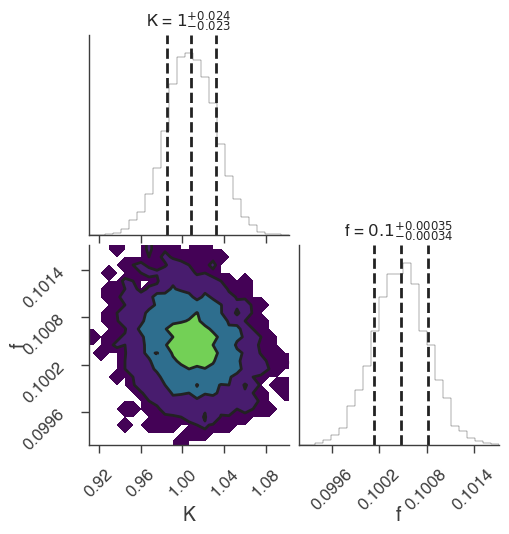

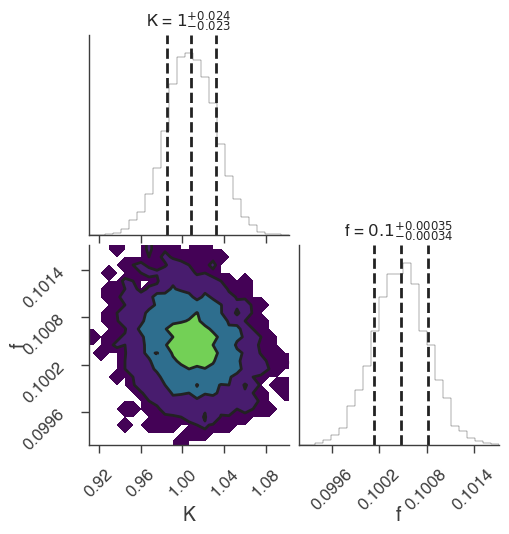

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

15:55:15 INFO      sampler set to zeus                                                     ]8;id=797002;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=268669;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:17, 34.96it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:23, 25.86it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:21, 29.10it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:19, 31.50it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:17, 33.70it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:17, 35.32it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:16, 35.87it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:16, 37.03it/s]

Sampling progress :   6%|▌         | 36/625 [00:01<00:15, 36.97it/s]

Sampling progress :   6%|▋         | 40/625 [00:01<00:15, 37.16it/s]

Sampling progress :   7%|▋         | 44/625 [00:01<00:15, 36.35it/s]

Sampling progress :   8%|▊         | 48/625 [00:01<00:15, 36.24it/s]

Sampling progress :   8%|▊         | 52/625 [00:01<00:15, 36.41it/s]

Sampling progress :   9%|▉         | 56/625 [00:01<00:15, 36.55it/s]

Sampling progress :  10%|▉         | 60/625 [00:01<00:15, 36.83it/s]

Sampling progress :  10%|█         | 64/625 [00:01<00:15, 36.72it/s]

Sampling progress :  11%|█         | 68/625 [00:01<00:14, 37.21it/s]

Sampling progress :  12%|█▏        | 72/625 [00:02<00:15, 36.79it/s]

Sampling progress :  12%|█▏        | 76/625 [00:02<00:14, 37.54it/s]

Sampling progress :  13%|█▎        | 80/625 [00:02<00:14, 37.32it/s]

Sampling progress :  13%|█▎        | 84/625 [00:02<00:14, 37.03it/s]

Sampling progress :  14%|█▍        | 88/625 [00:02<00:14, 36.64it/s]

Sampling progress :  15%|█▍        | 92/625 [00:02<00:14, 37.56it/s]

Sampling progress :  16%|█▌        | 97/625 [00:02<00:13, 40.33it/s]

Sampling progress :  16%|█▋        | 102/625 [00:02<00:13, 39.54it/s]

Sampling progress :  17%|█▋        | 107/625 [00:02<00:12, 40.29it/s]

Sampling progress :  18%|█▊        | 112/625 [00:03<00:12, 39.66it/s]

Sampling progress :  19%|█▊        | 116/625 [00:03<00:12, 39.70it/s]

Sampling progress :  19%|█▉        | 120/625 [00:03<00:12, 39.54it/s]

Sampling progress :  20%|██        | 125/625 [00:03<00:12, 40.72it/s]

Sampling progress :  21%|██        | 130/625 [00:03<00:12, 39.58it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:13, 36.53it/s]

Sampling progress :  22%|██▏       | 139/625 [00:03<00:12, 37.44it/s]

Sampling progress :  23%|██▎       | 144/625 [00:03<00:12, 38.86it/s]

Sampling progress :  24%|██▎       | 148/625 [00:04<00:12, 37.09it/s]

Sampling progress :  24%|██▍       | 152/625 [00:04<00:12, 36.86it/s]

Sampling progress :  25%|██▌       | 157/625 [00:04<00:12, 38.76it/s]

Sampling progress :  26%|██▌       | 161/625 [00:04<00:12, 37.49it/s]

Sampling progress :  26%|██▋       | 165/625 [00:04<00:12, 36.00it/s]

Sampling progress :  27%|██▋       | 169/625 [00:04<00:12, 37.03it/s]

Sampling progress :  28%|██▊       | 173/625 [00:04<00:12, 37.34it/s]

Sampling progress :  28%|██▊       | 177/625 [00:04<00:11, 37.48it/s]

Sampling progress :  29%|██▉       | 181/625 [00:04<00:12, 34.63it/s]

Sampling progress :  30%|██▉       | 185/625 [00:05<00:12, 34.79it/s]

Sampling progress :  30%|███       | 189/625 [00:05<00:12, 35.09it/s]

Sampling progress :  31%|███       | 194/625 [00:05<00:11, 37.12it/s]

Sampling progress :  32%|███▏      | 198/625 [00:05<00:11, 36.90it/s]

Sampling progress :  32%|███▏      | 202/625 [00:05<00:11, 37.10it/s]

Sampling progress :  33%|███▎      | 206/625 [00:05<00:11, 34.96it/s]

Sampling progress :  34%|███▎      | 210/625 [00:05<00:12, 33.93it/s]

Sampling progress :  34%|███▍      | 214/625 [00:05<00:11, 34.67it/s]

Sampling progress :  35%|███▍      | 218/625 [00:05<00:12, 33.75it/s]

Sampling progress :  36%|███▌      | 222/625 [00:06<00:11, 33.93it/s]

Sampling progress :  36%|███▋      | 227/625 [00:06<00:10, 37.47it/s]

Sampling progress :  37%|███▋      | 232/625 [00:06<00:09, 39.35it/s]

Sampling progress :  38%|███▊      | 236/625 [00:06<00:10, 37.91it/s]

Sampling progress :  38%|███▊      | 240/625 [00:06<00:10, 37.62it/s]

Sampling progress :  39%|███▉      | 244/625 [00:06<00:10, 38.04it/s]

Sampling progress :  40%|███▉      | 249/625 [00:06<00:09, 40.27it/s]

Sampling progress :  41%|████      | 254/625 [00:06<00:09, 37.92it/s]

Sampling progress :  41%|████▏     | 258/625 [00:07<00:09, 37.24it/s]

Sampling progress :  42%|████▏     | 262/625 [00:07<00:10, 36.27it/s]

Sampling progress :  43%|████▎     | 266/625 [00:07<00:09, 36.67it/s]

Sampling progress :  43%|████▎     | 271/625 [00:07<00:08, 39.35it/s]

Sampling progress :  44%|████▍     | 276/625 [00:07<00:08, 40.10it/s]

Sampling progress :  45%|████▍     | 281/625 [00:07<00:08, 38.56it/s]

Sampling progress :  46%|████▌     | 286/625 [00:07<00:08, 39.07it/s]

Sampling progress :  46%|████▋     | 290/625 [00:07<00:08, 38.55it/s]

Sampling progress :  47%|████▋     | 294/625 [00:07<00:08, 36.96it/s]

Sampling progress :  48%|████▊     | 298/625 [00:08<00:08, 37.64it/s]

Sampling progress :  48%|████▊     | 302/625 [00:08<00:08, 38.10it/s]

Sampling progress :  49%|████▉     | 306/625 [00:08<00:08, 38.21it/s]

Sampling progress :  50%|████▉     | 310/625 [00:08<00:08, 38.04it/s]

Sampling progress :  50%|█████     | 314/625 [00:08<00:08, 38.40it/s]

Sampling progress :  51%|█████     | 318/625 [00:08<00:08, 38.07it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:08<00:07, 38.58it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:08<00:07, 37.93it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:08<00:07, 38.09it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:08<00:07, 37.80it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:09<00:07, 37.25it/s]

Sampling progress :  55%|█████▍    | 342/625 [00:09<00:07, 37.01it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:09<00:07, 38.86it/s]

Sampling progress :  56%|█████▌    | 351/625 [00:09<00:07, 38.63it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:09<00:07, 37.24it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:09<00:07, 35.52it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:09<00:07, 35.71it/s]

Sampling progress :  59%|█████▊    | 367/625 [00:09<00:07, 36.11it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:10<00:06, 36.91it/s]

Sampling progress :  60%|██████    | 377/625 [00:10<00:06, 38.09it/s]

Sampling progress :  61%|██████    | 381/625 [00:10<00:06, 38.38it/s]

Sampling progress :  62%|██████▏   | 385/625 [00:10<00:06, 37.79it/s]

Sampling progress :  62%|██████▏   | 389/625 [00:10<00:06, 38.35it/s]

Sampling progress :  63%|██████▎   | 393/625 [00:10<00:06, 37.59it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:10<00:05, 39.48it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:10<00:05, 39.18it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:10<00:05, 39.14it/s]

Sampling progress :  66%|██████▌   | 411/625 [00:11<00:05, 40.19it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:11<00:05, 40.55it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:11<00:05, 39.51it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:11<00:05, 39.00it/s]

Sampling progress :  69%|██████▉   | 430/625 [00:11<00:04, 40.07it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:11<00:04, 40.23it/s]

Sampling progress :  70%|███████   | 440/625 [00:11<00:04, 41.41it/s]

Sampling progress :  71%|███████   | 445/625 [00:11<00:04, 42.12it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:11<00:04, 41.48it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:12<00:04, 39.52it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:12<00:04, 38.69it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:12<00:04, 38.49it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:12<00:04, 37.89it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:12<00:04, 38.41it/s]

Sampling progress :  76%|███████▌  | 475/625 [00:12<00:03, 38.41it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:12<00:03, 38.32it/s]

Sampling progress :  77%|███████▋  | 483/625 [00:12<00:03, 38.22it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:12<00:03, 37.02it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:13<00:03, 36.94it/s]

Sampling progress :  79%|███████▉  | 495/625 [00:13<00:03, 37.38it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:13<00:03, 37.58it/s]

Sampling progress :  80%|████████  | 503/625 [00:13<00:03, 37.80it/s]

Sampling progress :  81%|████████▏ | 508/625 [00:13<00:02, 39.28it/s]

Sampling progress :  82%|████████▏ | 512/625 [00:13<00:02, 38.33it/s]

Sampling progress :  83%|████████▎ | 516/625 [00:13<00:02, 38.18it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:13<00:02, 40.02it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:13<00:02, 39.83it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:14<00:02, 41.01it/s]

Sampling progress :  86%|████████▌ | 535/625 [00:14<00:02, 40.83it/s]

Sampling progress :  86%|████████▋ | 540/625 [00:14<00:02, 38.46it/s]

Sampling progress :  87%|████████▋ | 544/625 [00:14<00:02, 37.37it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:14<00:02, 37.32it/s]

Sampling progress :  88%|████████▊ | 552/625 [00:14<00:01, 37.35it/s]

Sampling progress :  89%|████████▉ | 556/625 [00:14<00:01, 36.02it/s]

Sampling progress :  90%|████████▉ | 560/625 [00:14<00:01, 36.00it/s]

Sampling progress :  90%|█████████ | 564/625 [00:14<00:01, 36.34it/s]

Sampling progress :  91%|█████████ | 568/625 [00:15<00:01, 36.71it/s]

Sampling progress :  92%|█████████▏| 572/625 [00:15<00:01, 34.36it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:15<00:01, 34.54it/s]

Sampling progress :  93%|█████████▎| 581/625 [00:15<00:01, 36.79it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:15<00:01, 36.33it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:15<00:00, 36.69it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:15<00:00, 35.19it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:15<00:00, 35.78it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:16<00:00, 32.85it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:16<00:00, 35.47it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:16<00:00, 35.70it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:16<00:00, 36.36it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:16<00:00, 35.47it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:16<00:00, 36.23it/s]

Sampling progress : 100%|██████████| 625/625 [00:16<00:00, 37.41it/s]

15:55:33 INFO      fit restored to maximum of posterior                                         ]8;id=427715;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=303473;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=368802;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=718484;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 22


Scale Factor: 1.384886


Mean Integrated Autocorrelation Time: 3.16


Effective Sample Size: 3960.28


Number of Log Probability Evaluations: 65282


Effective Samples per Log Probability Evaluation: 0.060664


None


Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K                   1.008 +/- 0.024  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0047 -0.0035 +0.0034) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.562838
total       -11.562838

Values of statistical measures:

statistical measures
AIC              27.831557
BIC              29.117140
DIC              27.230361
PDIC              2.052450

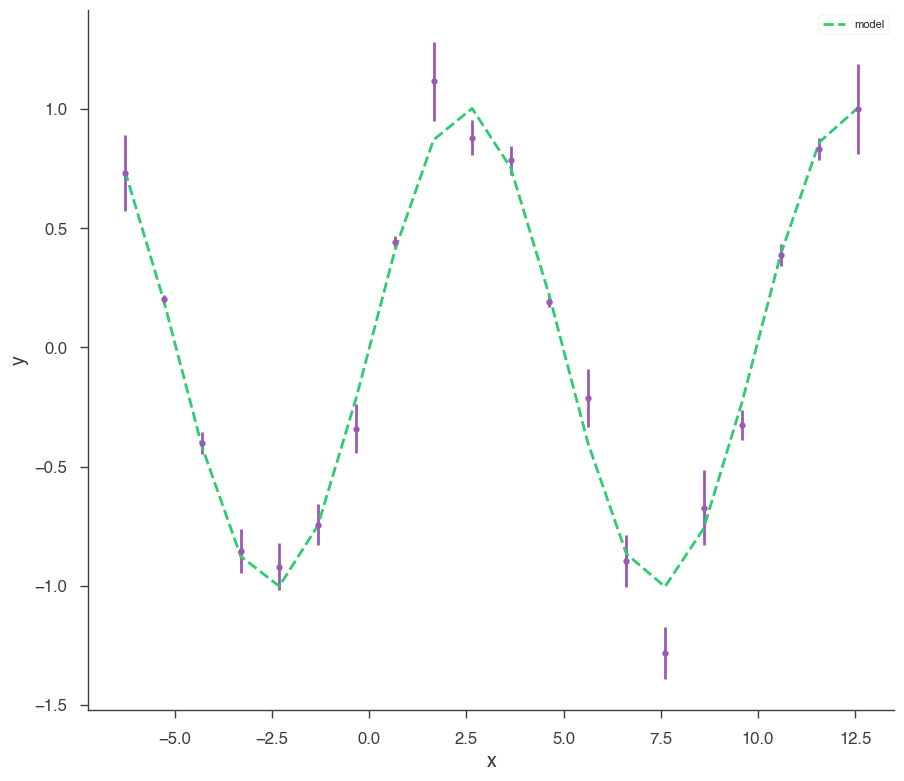

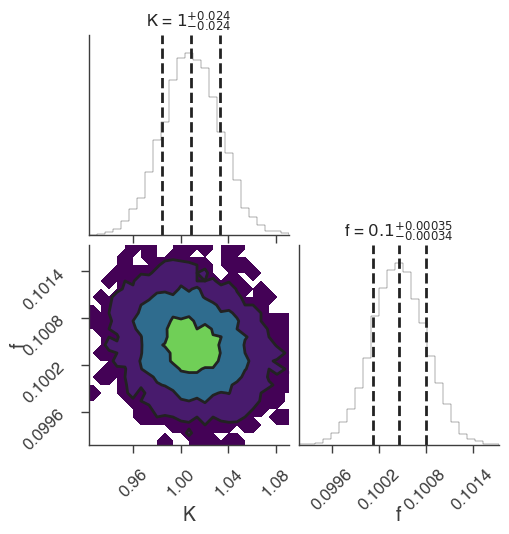

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

15:55:34 INFO      sampler set to ultranest                                                ]8;id=569400;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=563792;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 9275


[ultranest]   logZ = -20.84 +- 0.1209


[ultranest] Effective samples strategy satisfied (ESS = 982.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


15:55:45 INFO      fit restored to maximum of posterior                                         ]8;id=481670;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=118401;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=161419;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=327330;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                 
demo.spectrum.main.Sin.K              1.008 -0.025 +0.023  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0045 -0.0034 +0.004) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -11.563309
total       -11.563309

Values of statistical measures:

statistical measures
AIC                27.832500
BIC                29.118082
DIC                27.359324
PDIC                2.114802
log(Z)             -9.053387

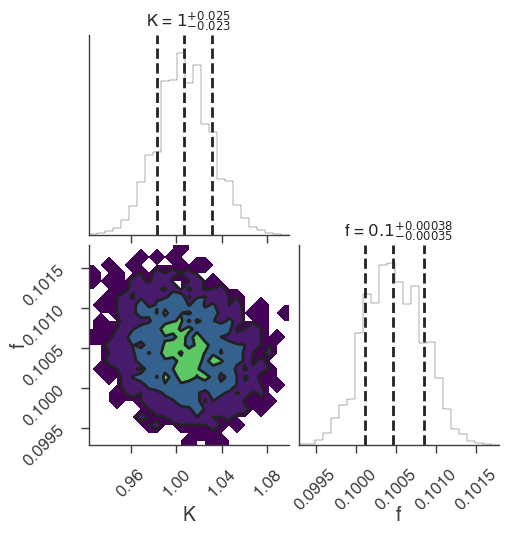

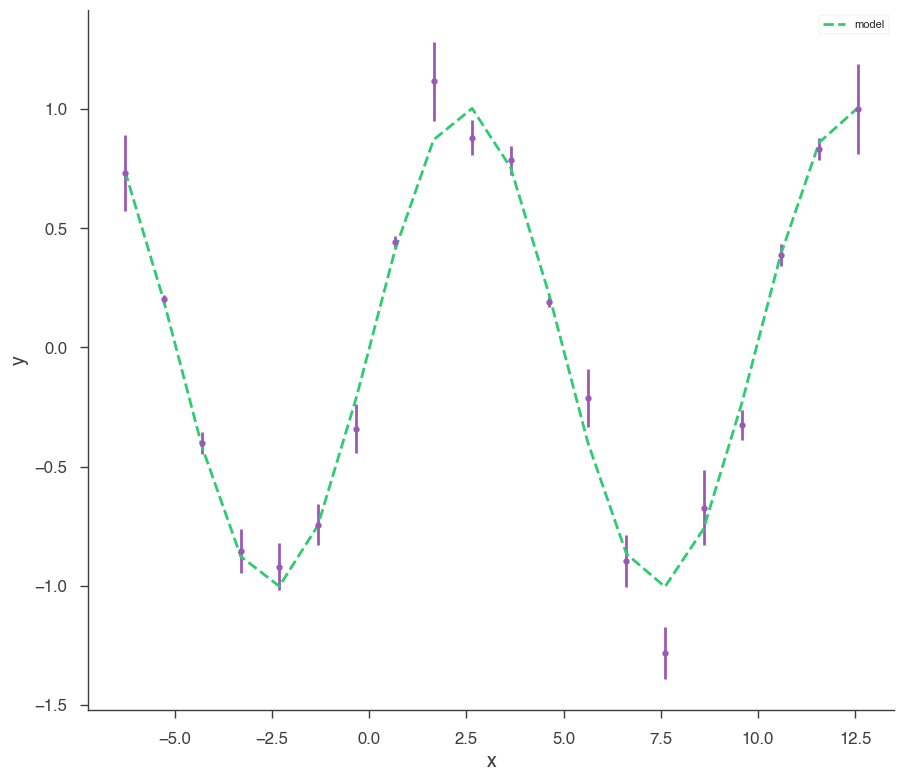

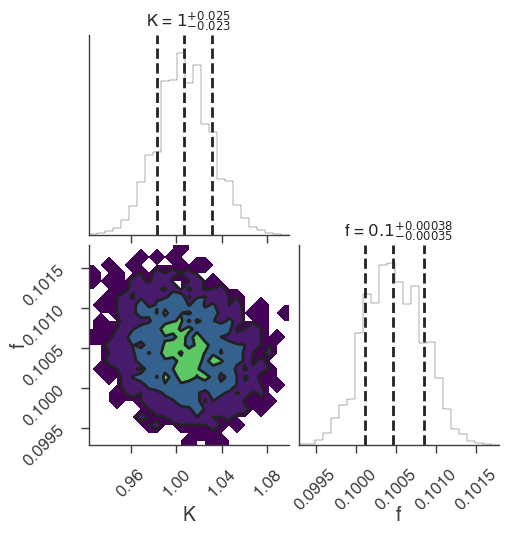

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()